In [91]:
import openpyxl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from matplotlib import pyplot as plt
import datetime
import math
import pandas as pd
from scipy import stats
import seaborn as sn

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Drops specific values in a dataframe
# if flag = 1, drops values less than 'val'
# if flag = 0, drops values greater than 'val'
def drop_values(dataframe, column, val, flag):
    if flag:
        return dataframe.drop(dataframe[column < val].index)
    else:
        return dataframe.drop(dataframe[column > val].index)

# THE EGG1 DATASET
egg_1_dataframe_1 = pd.read_csv('Egg#1/2020-05-16 Download_egg0080446e6e980130.csv')
egg_1_dataframe_2 = pd.read_csv('Egg#1/2020-05-25 Download_egg0080446e6e980130.csv')
egg_1_dataframe_3 = pd.read_csv('Egg#1/2020-06-02 Download_egg0080446e6e980130.csv')
egg_1_dataframe_4 = pd.read_csv('Egg#1/2020-06-11 Download_egg0080446e6e980130.csv')
egg_1_dataframe_5 = pd.read_csv('Egg#1/2020-06-19 Download_egg0080446e6e980130.csv')
egg_1_dataframe_6 = pd.read_csv('Egg#1/2020-06-26 Download_egg0080446e6e980130.csv')
egg_1_dataframe_7 = pd.read_csv('Egg#1/2020-07-02 Download_egg0080446e6e980130.csv')
egg_1_dataframe_8 = pd.read_csv('Egg#1/2020-07-10 Download_egg0080446e6e980130.csv')
egg_1_dataframe_9 = pd.read_csv('Egg#1/2020-07-16 Download_egg0080446e6e980130.csv')
egg_1_dataframe_10 = pd.read_csv('Egg#1/2020-07-24 Download_egg0080446e6e980130.csv')
egg_1_dataframe_11 = pd.read_csv('Egg#1/2020-08-05 Download_egg0080446e6e980130.csv')
egg_1_dataframe_12 = pd.read_csv('Egg#1/2020-08-12 Download_egg0080446e6e980130.csv')
egg_1_dataframe_13 = pd.read_csv('Egg#1/2020-08-19 Download_egg0080446e6e980130.csv')
egg_1_dataframe_14 = pd.read_csv('Egg#1/2020-08-26 Download_egg0080446e6e980130.csv')
egg_1_dataframe_15 = pd.read_csv('Egg#1/2020-09-02 Download_egg0080446e6e980130.csv')
# Remove the Latitude, Longitude, and Altitude 
egg_1_dataframe_1 = egg_1_dataframe_1.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_1_dataframe_2 = egg_1_dataframe_2.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_1_dataframe_3 = egg_1_dataframe_3.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_1_dataframe_4 = egg_1_dataframe_4.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_1_dataframe_5 = egg_1_dataframe_5.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_1_dataframe_6 = egg_1_dataframe_6.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_1_dataframe_7 = egg_1_dataframe_7.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_1_dataframe_8 = egg_1_dataframe_8.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_1_dataframe_9 = egg_1_dataframe_9.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_1_dataframe_10 = egg_1_dataframe_10.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_1_dataframe_11 = egg_1_dataframe_11.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_1_dataframe_12 = egg_1_dataframe_12.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_1_dataframe_13 = egg_1_dataframe_13.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_1_dataframe_14 = egg_1_dataframe_14.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_1_dataframe_15 = egg_1_dataframe_15.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
# Convert the Timestamp column to an index and resample to 60 min averages
egg_1_dataframe_1['Timestamp'] = pd.to_datetime(egg_1_dataframe_1['Timestamp'])
egg_1_dataframe_2['Timestamp'] = pd.to_datetime(egg_1_dataframe_2['Timestamp'])
egg_1_dataframe_3['Timestamp'] = pd.to_datetime(egg_1_dataframe_3['Timestamp'])
egg_1_dataframe_4['Timestamp'] = pd.to_datetime(egg_1_dataframe_4['Timestamp'])
egg_1_dataframe_5['Timestamp'] = pd.to_datetime(egg_1_dataframe_5['Timestamp'])
egg_1_dataframe_6['Timestamp'] = pd.to_datetime(egg_1_dataframe_6['Timestamp'])
egg_1_dataframe_7['Timestamp'] = pd.to_datetime(egg_1_dataframe_7['Timestamp'])
egg_1_dataframe_8['Timestamp'] = pd.to_datetime(egg_1_dataframe_8['Timestamp'])
egg_1_dataframe_9['Timestamp'] = pd.to_datetime(egg_1_dataframe_9['Timestamp'])
egg_1_dataframe_10['Timestamp'] = pd.to_datetime(egg_1_dataframe_10['Timestamp'])
egg_1_dataframe_11['Timestamp'] = pd.to_datetime(egg_1_dataframe_11['Timestamp'])
egg_1_dataframe_12['Timestamp'] = pd.to_datetime(egg_1_dataframe_12['Timestamp'])
egg_1_dataframe_13['Timestamp'] = pd.to_datetime(egg_1_dataframe_13['Timestamp'])
egg_1_dataframe_14['Timestamp'] = pd.to_datetime(egg_1_dataframe_14['Timestamp'])
egg_1_dataframe_15['Timestamp'] = pd.to_datetime(egg_1_dataframe_15['Timestamp'])
# Merge all the files into 1 dataframe
egg_1_dataframe = pd.concat((egg_1_dataframe_1, egg_1_dataframe_2, egg_1_dataframe_3, egg_1_dataframe_4,
                            egg_1_dataframe_5, egg_1_dataframe_6, egg_1_dataframe_7, egg_1_dataframe_8,
                            egg_1_dataframe_9, egg_1_dataframe_10, egg_1_dataframe_11, egg_1_dataframe_12,
                            egg_1_dataframe_13, egg_1_dataframe_14, egg_1_dataframe_15))
egg_1_dataframe['Timestamp'] = pd.to_datetime(egg_1_dataframe['Timestamp'])
egg_1_dataframe = egg_1_dataframe.resample('60min', on='Timestamp').mean()
egg_1_dataframe.to_pickle('EGG1_HOURLY.pkl')
egg_1_dataframe.to_csv('EGG1_HOURLY.csv')

In [92]:
dataframe = egg_1_dataframe
dataframe

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa]
Timestamp,,,,,,,,,,
2020-05-06 13:00:00,20.520000,20.116667,3.166667,3.666667,4.000000,142.300000,1.421641,1935.236667,1.410120,99261.900000
2020-05-06 14:00:00,17.968333,24.757292,13.868750,15.925000,16.810417,63.958958,1.423080,263.038333,1.422146,99264.718750
2020-05-06 15:00:00,22.348833,19.432667,1.673333,2.333333,2.475000,60.012667,1.423583,95.994500,1.423568,99188.643333
2020-05-06 16:00:00,22.438667,18.594000,1.186667,1.920000,2.090000,61.118000,1.423567,56.341500,1.423861,99138.068333
2020-05-06 17:00:00,22.471500,18.093833,1.471667,2.248333,2.441667,62.872167,1.423533,49.240500,1.423915,99108.190000
...,...,...,...,...,...,...,...,...,...,...
2020-09-02 05:00:00,22.295667,77.541000,6.738333,9.838333,10.160000,39.836167,1.424001,150.701333,1.423165,98775.058333
2020-09-02 06:00:00,22.626833,76.722500,6.543333,9.490000,9.821667,40.159333,1.424025,153.693000,1.423159,98737.496667
2020-09-02 07:00:00,23.141667,76.450667,6.051667,8.883333,9.171667,39.539167,1.424094,153.420833,1.423186,98672.236667


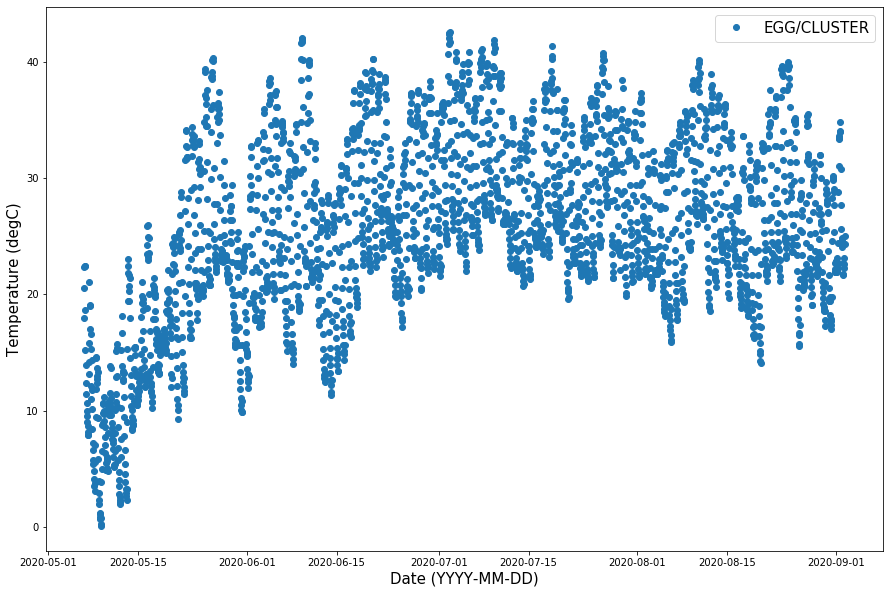

In [94]:
# ----------------------------- TEMPERATURE FROM CLUSTER vs. AIR_TEMPERATURE FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['Temperature[degC]'], 'o', label="EGG/CLUSTER")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('Temperature (degC)', fontsize=15)
plt.legend(loc='best', fontsize=15)

In [104]:
airpointer = pd.read_csv('data/20200923_194418_2019_00697_HC_697_48129.csv')
airpointer = airpointer.rename(columns={'Time':'Timestamp'})
airpointer['Timestamp'] = pd.to_datetime(airpointer['Timestamp'])
airpointer = airpointer.set_index('Timestamp')
airpointer

,NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Pressure,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,,
2020-05-06 13:00:00,1.646,3.425,5.072,38.173,13.570,9.732,3.834,991.865,12.071,29.295
2020-05-06 14:00:00,1.397,3.086,4.483,39.447,14.779,10.735,4.045,991.566,12.162,29.102
2020-05-06 15:00:00,1.237,2.699,3.905,40.509,12.838,8.890,3.945,991.147,12.286,28.184
2020-05-06 16:00:00,1.490,3.941,5.639,40.473,15.705,11.404,4.303,990.687,12.375,27.602
2020-05-06 17:00:00,1.910,5.132,6.875,40.592,19.672,15.035,4.628,990.413,12.848,26.503
...,...,...,...,...,...,...,...,...,...,...
2020-09-02 06:00:00,5.220,11.060,16.392,12.617,9.391,4.642,4.751,986.224,19.976,91.219
2020-09-02 07:00:00,2.313,10.186,12.571,13.036,9.967,5.233,4.733,985.630,20.552,90.004
2020-09-02 08:00:00,2.969,10.316,13.186,14.283,12.361,6.779,5.582,985.282,21.616,86.765


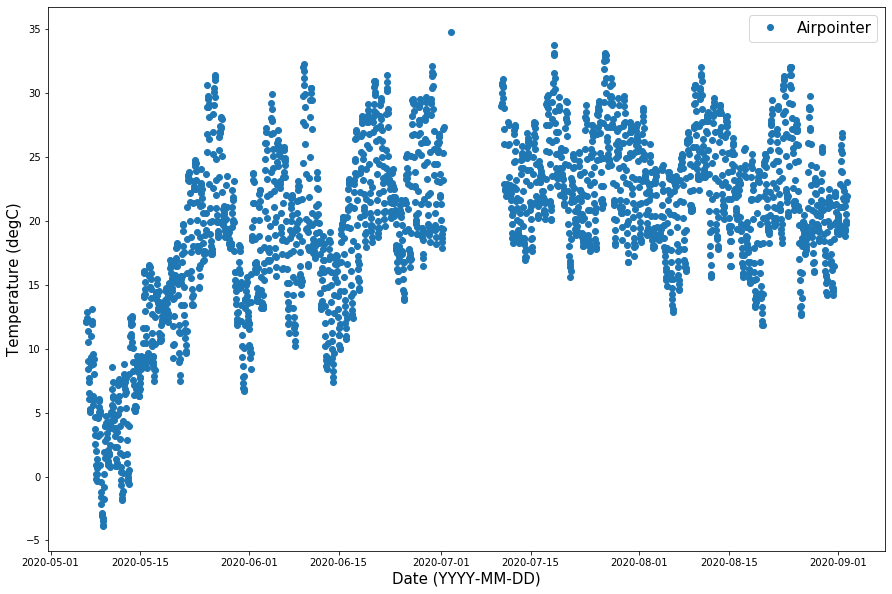

In [105]:
# ----------------------------- TEMPERATURE FROM CLUSTER vs. AIR_TEMPERATURE FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(airpointer.index.to_series(), airpointer['Air_Temperature'], 'o', label="Airpointer")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('Temperature (degC)', fontsize=15)
plt.legend(loc='best', fontsize=15)

In [97]:
master = dataframe.join(airpointer, how='outer')
master

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Pressure,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,,,,,,,,,,,,
2020-05-06 13:00:00,20.520000,20.116667,3.166667,3.666667,4.000000,142.300000,1.421641,1935.236667,1.410120,99261.900000,1.646,3.425,5.072,38.173,13.570,9.732,3.834,991.865,12.071,29.295
2020-05-06 14:00:00,17.968333,24.757292,13.868750,15.925000,16.810417,63.958958,1.423080,263.038333,1.422146,99264.718750,1.397,3.086,4.483,39.447,14.779,10.735,4.045,991.566,12.162,29.102
2020-05-06 15:00:00,22.348833,19.432667,1.673333,2.333333,2.475000,60.012667,1.423583,95.994500,1.423568,99188.643333,1.237,2.699,3.905,40.509,12.838,8.890,3.945,991.147,12.286,28.184
2020-05-06 16:00:00,22.438667,18.594000,1.186667,1.920000,2.090000,61.118000,1.423567,56.341500,1.423861,99138.068333,1.490,3.941,5.639,40.473,15.705,11.404,4.303,990.687,12.375,27.602
2020-05-06 17:00:00,22.471500,18.093833,1.471667,2.248333,2.441667,62.872167,1.423533,49.240500,1.423915,99108.190000,1.910,5.132,6.875,40.592,19.672,15.035,4.628,990.413,12.848,26.503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-02 06:00:00,22.626833,76.722500,6.543333,9.490000,9.821667,40.159333,1.424025,153.693000,1.423159,98737.496667,5.220,11.060,16.392,12.617,9.391,4.642,4.751,986.224,19.976,91.219
2020-09-02 07:00:00,23.141667,76.450667,6.051667,8.883333,9.171667,39.539167,1.424094,153.420833,1.423186,98672.236667,2.313,10.186,12.571,13.036,9.967,5.233,4.733,985.630,20.552,90.004
2020-09-02 08:00:00,24.321333,73.825667,7.448333,11.240000,11.660000,40.020167,1.424219,150.745000,1.423264,98633.733333,2.969,10.316,13.186,14.283,12.361,6.779,5.582,985.282,21.616,86.765


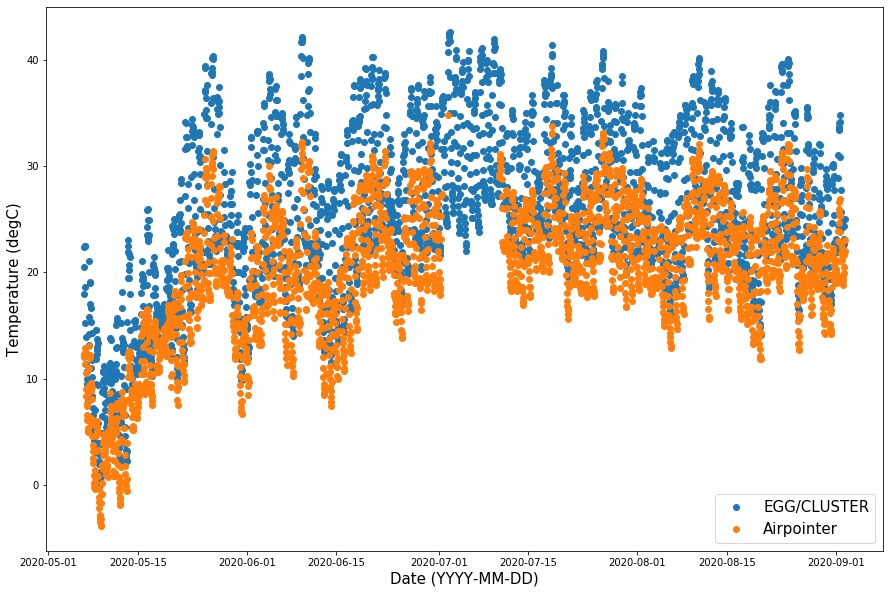

In [99]:
# ----------------------------- TEMPERATURE FROM CLUSTER vs. AIR_TEMPERATURE FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(master.index.to_series(), master['Temperature[degC]'], 'o', label="EGG/CLUSTER")
plt.plot(master.index.to_series(), master['Air_Temperature'], 'o', label='Airpointer')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('Temperature (degC)', fontsize=15)
plt.legend(loc='best', fontsize=15)

In [17]:
# THE EGG2 DATASET
egg_2_dataframe_1 = pd.read_csv('Egg#2/2020-05-16 Download_egg0080446fa82b0130.csv')
egg_2_dataframe_2 = pd.read_csv('Egg#2/2020-05-25 Download_egg0080446fa82b0130.csv')
egg_2_dataframe_3 = pd.read_csv('Egg#2/2020-06-02 Download_egg0080446fa82b0130.csv')
egg_2_dataframe_4 = pd.read_csv('Egg#2/2020-06-11 Download_egg0080446fa82b0130.csv')
egg_2_dataframe_5 = pd.read_csv('Egg#2/2020-06-19 Download_egg0080446fa82b0130.csv')
egg_2_dataframe_6 = pd.read_csv('Egg#2/2020-06-26 Download_egg0080446fa82b0130.csv')
egg_2_dataframe_7 = pd.read_csv('Egg#2/2020-07-02 Download_egg0080446fa82b0130.csv')
egg_2_dataframe_8 = pd.read_csv('Egg#2/2020-07-10 Download_egg0080446fa82b0130.csv')
egg_2_dataframe_9 = pd.read_csv('Egg#2/2020-07-16 Download_egg0080446fa82b0130.csv')
egg_2_dataframe_10 = pd.read_csv('Egg#2/2020-07-24 Download_egg0080446fa82b0130.csv')
egg_2_dataframe_11 = pd.read_csv('Egg#2/2020-08-05 Download_egg0080446fa82b0130.csv')
egg_2_dataframe_12 = pd.read_csv('Egg#2/2020-08-12 Download_egg0080446fa82b0130.csv')
egg_2_dataframe_13 = pd.read_csv('Egg#2/2020-08-19 Download_egg0080446fa82b0130.csv')
egg_2_dataframe_14 = pd.read_csv('Egg#2/2020-08-26 Download_egg0080446fa82b0130.csv')
egg_2_dataframe_15 = pd.read_csv('Egg#2/2020-09-02 Download_egg0080446fa82b0130.csv')
# Remove the Latitude, Longitude, and Altitude 
egg_2_dataframe_1 = egg_2_dataframe_1.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_2_dataframe_2 = egg_2_dataframe_2.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_2_dataframe_3 = egg_2_dataframe_3.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_2_dataframe_4 = egg_2_dataframe_4.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_2_dataframe_5 = egg_2_dataframe_5.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_2_dataframe_6 = egg_2_dataframe_6.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_2_dataframe_7 = egg_2_dataframe_7.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_2_dataframe_8 = egg_2_dataframe_8.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_2_dataframe_9 = egg_2_dataframe_9.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_2_dataframe_10 = egg_2_dataframe_10.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_2_dataframe_11 = egg_2_dataframe_11.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_2_dataframe_12 = egg_2_dataframe_12.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_2_dataframe_13 = egg_2_dataframe_13.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_2_dataframe_14 = egg_2_dataframe_14.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_2_dataframe_15 = egg_2_dataframe_15.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
# Convert the Timestamp column to an index and resample to 60 min averages
egg_2_dataframe_1['Timestamp'] = pd.to_datetime(egg_2_dataframe_1['Timestamp'])
egg_2_dataframe_2['Timestamp'] = pd.to_datetime(egg_2_dataframe_2['Timestamp'])
egg_2_dataframe_3['Timestamp'] = pd.to_datetime(egg_2_dataframe_3['Timestamp'])
egg_2_dataframe_4['Timestamp'] = pd.to_datetime(egg_2_dataframe_4['Timestamp'])
egg_2_dataframe_5['Timestamp'] = pd.to_datetime(egg_2_dataframe_5['Timestamp'])
egg_2_dataframe_6['Timestamp'] = pd.to_datetime(egg_2_dataframe_6['Timestamp'])
egg_2_dataframe_7['Timestamp'] = pd.to_datetime(egg_2_dataframe_7['Timestamp'])
egg_2_dataframe_8['Timestamp'] = pd.to_datetime(egg_2_dataframe_8['Timestamp'])
egg_2_dataframe_9['Timestamp'] = pd.to_datetime(egg_2_dataframe_9['Timestamp'])
egg_2_dataframe_10['Timestamp'] = pd.to_datetime(egg_2_dataframe_10['Timestamp'])
egg_2_dataframe_11['Timestamp'] = pd.to_datetime(egg_2_dataframe_11['Timestamp'])
egg_2_dataframe_12['Timestamp'] = pd.to_datetime(egg_2_dataframe_12['Timestamp'])
egg_2_dataframe_13['Timestamp'] = pd.to_datetime(egg_2_dataframe_13['Timestamp'])
egg_2_dataframe_14['Timestamp'] = pd.to_datetime(egg_2_dataframe_14['Timestamp'])
egg_2_dataframe_15['Timestamp'] = pd.to_datetime(egg_2_dataframe_15['Timestamp'])
# Merge all the files into 1 dataframe
egg_2_dataframe = pd.concat((egg_2_dataframe_1, egg_2_dataframe_2, egg_2_dataframe_3, egg_2_dataframe_4,
                            egg_2_dataframe_5, egg_2_dataframe_6, egg_2_dataframe_7, egg_2_dataframe_8,
                            egg_2_dataframe_9, egg_2_dataframe_10, egg_2_dataframe_11, egg_2_dataframe_12,
                            egg_2_dataframe_13, egg_2_dataframe_14, egg_2_dataframe_15))
egg_2_dataframe['Timestamp'] = pd.to_datetime(egg_2_dataframe['Timestamp'])
egg_2_dataframe = egg_2_dataframe.resample('60min', on='Timestamp').mean()
egg_2_dataframe.to_pickle('EGG2_HOURLY.pkl')
egg_2_dataframe.to_csv('EGG2_HOURLY.csv')

In [18]:
# THE EGG4 DATASET
egg_4_dataframe_1 = pd.read_csv('Egg#4/2020-05-16 Download_egg00804426a6980132.csv')
egg_4_dataframe_2 = pd.read_csv('Egg#4/2020-05-25 Download_egg00804426a6980132.csv')
egg_4_dataframe_3 = pd.read_csv('Egg#4/2020-06-02 Download_egg00804426a6980132.csv')
egg_4_dataframe_4 = pd.read_csv('Egg#4/2020-06-11 Download_egg00804426a6980132.csv')
egg_4_dataframe_5 = pd.read_csv('Egg#4/2020-06-19 Download_egg00804426a6980132.csv')
egg_4_dataframe_6 = pd.read_csv('Egg#4/2020-06-26 Download_egg00804426a6980132.csv')
egg_4_dataframe_7 = pd.read_csv('Egg#4/2020-07-02 Download_egg00804426a6980132.csv')
egg_4_dataframe_8 = pd.read_csv('Egg#4/2020-07-10 Download_egg00804426a6980132.csv')
egg_4_dataframe_9 = pd.read_csv('Egg#4/2020-07-16 Download_egg00804426a6980132.csv')
egg_4_dataframe_10 = pd.read_csv('Egg#4/2020-07-24 Download_egg00804426a6980132.csv')
egg_4_dataframe_11 = pd.read_csv('Egg#4/2020-08-05 Download_egg00804426a6980132.csv')
egg_4_dataframe_12 = pd.read_csv('Egg#4/2020-08-12 Download_egg00804426a6980132.csv')
egg_4_dataframe_13 = pd.read_csv('Egg#4/2020-08-19 Download_egg00804426a6980132.csv')
egg_4_dataframe_14 = pd.read_csv('Egg#4/2020-08-26 Download_egg00804426a6980132.csv')
egg_4_dataframe_15 = pd.read_csv('Egg#4/2020-09-02 Download_egg00804426a6980132.csv')
# Remove the Latitude, Longitude, and Altitude 
egg_4_dataframe_1 = egg_4_dataframe_1.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_4_dataframe_2 = egg_4_dataframe_2.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_4_dataframe_3 = egg_4_dataframe_3.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_4_dataframe_4 = egg_4_dataframe_4.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_4_dataframe_5 = egg_4_dataframe_5.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_4_dataframe_6 = egg_4_dataframe_6.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_4_dataframe_7 = egg_4_dataframe_7.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_4_dataframe_8 = egg_4_dataframe_8.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_4_dataframe_9 = egg_4_dataframe_9.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_4_dataframe_10 = egg_4_dataframe_10.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_4_dataframe_11 = egg_4_dataframe_11.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_4_dataframe_12 = egg_4_dataframe_12.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_4_dataframe_13 = egg_4_dataframe_13.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_4_dataframe_14 = egg_4_dataframe_14.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
egg_4_dataframe_15 = egg_4_dataframe_15.drop(columns=['Latitude[deg]', 'Longitude[deg]', 'Altitude[m]'])
# Convert the Timestamp column to an index and resample to 60 min averages
egg_4_dataframe_1['Timestamp'] = pd.to_datetime(egg_4_dataframe_1['Timestamp'])
egg_4_dataframe_2['Timestamp'] = pd.to_datetime(egg_4_dataframe_2['Timestamp'])
egg_4_dataframe_3['Timestamp'] = pd.to_datetime(egg_4_dataframe_3['Timestamp'])
egg_4_dataframe_4['Timestamp'] = pd.to_datetime(egg_4_dataframe_4['Timestamp'])
egg_4_dataframe_5['Timestamp'] = pd.to_datetime(egg_4_dataframe_5['Timestamp'])
egg_4_dataframe_6['Timestamp'] = pd.to_datetime(egg_4_dataframe_6['Timestamp'])
egg_4_dataframe_7['Timestamp'] = pd.to_datetime(egg_4_dataframe_7['Timestamp'])
egg_4_dataframe_8['Timestamp'] = pd.to_datetime(egg_4_dataframe_8['Timestamp'])
egg_4_dataframe_9['Timestamp'] = pd.to_datetime(egg_4_dataframe_9['Timestamp'])
egg_4_dataframe_10['Timestamp'] = pd.to_datetime(egg_4_dataframe_10['Timestamp'])
egg_4_dataframe_11['Timestamp'] = pd.to_datetime(egg_4_dataframe_11['Timestamp'])
egg_4_dataframe_12['Timestamp'] = pd.to_datetime(egg_4_dataframe_12['Timestamp'])
egg_4_dataframe_13['Timestamp'] = pd.to_datetime(egg_4_dataframe_13['Timestamp'])
egg_4_dataframe_14['Timestamp'] = pd.to_datetime(egg_4_dataframe_14['Timestamp'])
egg_4_dataframe_15['Timestamp'] = pd.to_datetime(egg_4_dataframe_15['Timestamp'])
# Merge all the files into 1 dataframe
egg_4_dataframe = pd.concat((egg_4_dataframe_1, egg_4_dataframe_2, egg_4_dataframe_3, egg_4_dataframe_4,
                            egg_4_dataframe_5, egg_4_dataframe_6, egg_4_dataframe_7, egg_4_dataframe_8,
                            egg_4_dataframe_9, egg_4_dataframe_10, egg_4_dataframe_11, egg_4_dataframe_12,
                            egg_4_dataframe_13, egg_4_dataframe_14, egg_4_dataframe_15))
egg_4_dataframe['Timestamp'] = pd.to_datetime(egg_4_dataframe['Timestamp'])
egg_4_dataframe = egg_4_dataframe.resample('60min', on='Timestamp').mean()
egg_4_dataframe.to_pickle('EGG4_HOURLY.pkl')
egg_4_dataframe.to_csv('EGG4_HOURLY.csv')

In [77]:
# Combine the airpointer 
airpointer = pd.read_csv('data/20200923_194418_2019_00697_HC_697_48129.csv')
airpointer = airpointer.rename(columns={'Time':'Timestamp'})
airpointer = airpointer.set_index('Timestamp')

egg_1 = pd.read_pickle('EGG1_HOURLY.pkl')
# egg_2 = pd.read_pickle('EGG2_HOURLY.pkl')
# egg_4 = pd.read_pickle('EGG4_HOURLY.pkl')

egg_1_master = egg_1.join(airpointer, how='outer')
# egg_1_master = egg_1_master.dropna()
dataframe = egg_1_master
dataframe = drop_values(dataframe, dataframe.index, '2020-09-02 9:00:00', 0)
dataframe

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Pressure,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,,,,,,,,,,,,
2020-05-06 13:00:00,20.520000,20.116667,3.166667,3.666667,4.000000,142.300000,1.421641,1935.236667,1.410120,99261.900000,1.646,3.425,5.072,38.173,13.570,9.732,3.834,991.865,12.071,29.295
2020-05-06 14:00:00,17.968333,24.757292,13.868750,15.925000,16.810417,63.958958,1.423080,263.038333,1.422146,99264.718750,1.397,3.086,4.483,39.447,14.779,10.735,4.045,991.566,12.162,29.102
2020-05-06 15:00:00,22.348833,19.432667,1.673333,2.333333,2.475000,60.012667,1.423583,95.994500,1.423568,99188.643333,1.237,2.699,3.905,40.509,12.838,8.890,3.945,991.147,12.286,28.184
2020-05-06 16:00:00,22.438667,18.594000,1.186667,1.920000,2.090000,61.118000,1.423567,56.341500,1.423861,99138.068333,1.490,3.941,5.639,40.473,15.705,11.404,4.303,990.687,12.375,27.602
2020-05-06 17:00:00,22.471500,18.093833,1.471667,2.248333,2.441667,62.872167,1.423533,49.240500,1.423915,99108.190000,1.910,5.132,6.875,40.592,19.672,15.035,4.628,990.413,12.848,26.503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-02 05:00:00,22.295667,77.541000,6.738333,9.838333,10.160000,39.836167,1.424001,150.701333,1.423165,98775.058333,1.121,8.162,9.292,17.731,9.885,5.034,4.847,986.623,19.764,91.640
2020-09-02 06:00:00,22.626833,76.722500,6.543333,9.490000,9.821667,40.159333,1.424025,153.693000,1.423159,98737.496667,5.220,11.060,16.392,12.617,9.391,4.642,4.751,986.224,19.976,91.219
2020-09-02 07:00:00,23.141667,76.450667,6.051667,8.883333,9.171667,39.539167,1.424094,153.420833,1.423186,98672.236667,2.313,10.186,12.571,13.036,9.967,5.233,4.733,985.630,20.552,90.004


In [82]:
airpointer = pd.read_csv('data/20200923_194418_2019_00697_HC_697_48129.csv')
airpointer = airpointer.rename(columns={'Time':'Timestamp'})
airpointer = airpointer.set_index('Timestamp')
airpointer

,NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Pressure,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,,
2020-05-06 13:00:00,1.646,3.425,5.072,38.173,13.570,9.732,3.834,991.865,12.071,29.295
2020-05-06 14:00:00,1.397,3.086,4.483,39.447,14.779,10.735,4.045,991.566,12.162,29.102
2020-05-06 15:00:00,1.237,2.699,3.905,40.509,12.838,8.890,3.945,991.147,12.286,28.184
2020-05-06 16:00:00,1.490,3.941,5.639,40.473,15.705,11.404,4.303,990.687,12.375,27.602
2020-05-06 17:00:00,1.910,5.132,6.875,40.592,19.672,15.035,4.628,990.413,12.848,26.503
...,...,...,...,...,...,...,...,...,...,...
2020-09-02 06:00:00,5.220,11.060,16.392,12.617,9.391,4.642,4.751,986.224,19.976,91.219
2020-09-02 07:00:00,2.313,10.186,12.571,13.036,9.967,5.233,4.733,985.630,20.552,90.004
2020-09-02 08:00:00,2.969,10.316,13.186,14.283,12.361,6.779,5.582,985.282,21.616,86.765


In [84]:
airpointer.index.to_series()

Timestamp
2020-05-06 13:00:00    2020-05-06 13:00:00
2020-05-06 14:00:00    2020-05-06 14:00:00
2020-05-06 15:00:00    2020-05-06 15:00:00
2020-05-06 16:00:00    2020-05-06 16:00:00
2020-05-06 17:00:00    2020-05-06 17:00:00
                              ...         
2020-09-02 06:00:00    2020-09-02 06:00:00
2020-09-02 07:00:00    2020-09-02 07:00:00
2020-09-02 08:00:00    2020-09-02 08:00:00
2020-09-02 09:00:00    2020-09-02 09:00:00
2020-09-02 10:00:00    2020-09-02 10:00:00
Name: Timestamp, Length: 2640, dtype: object

In [89]:
airpointer['Air_Temperature'].isnull().values.any()

False

In [74]:
egg_2_master = egg_2.join(airpointer, how='outer')
egg_2_master = egg_2_master.dropna()

egg_4_master = egg_4.join(airpointer, how='outer')
egg_4_master = egg_4_master.dropna()

egg_1_master = drop_values(egg_1_master, egg_1_master['NO2'], -1, 1)
egg_2_master = drop_values(egg_2_master, egg_2_master['NO2'], -1, 1)
egg_4_master = drop_values(egg_4_master, egg_4_master['NO2'], -1, 1)

egg_1_master.to_csv('EGG1_DATASET.csv')
egg_2_master.to_csv('EGG2_DATASET.csv')
egg_4_master.to_csv('EGG4_DATASET.csv')

egg_1_master.to_pickle('EGG1_DATASET.pkl')
egg_2_master.to_pickle('EGG2_DATASET.pkl')
egg_4_master.to_pickle('EGG4_DATASET.pkl')

In [42]:
egg_1_master = pd.read_pickle('EGG1_DATASET.pkl')
egg_2_master = pd.read_pickle('EGG2_DATASET.pkl')
egg_4_master = pd.read_pickle('EGG4_DATASET.pkl')

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Pressure,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,,,,,,,,,,,,
2020-05-06 13:00:00,20.520000,20.116667,3.166667,3.666667,4.000000,142.300000,1.421641,1935.236667,1.410120,99261.900000,1.646,3.425,5.072,38.173,13.570,9.732,3.834,991.865,12.071,29.295
2020-05-06 14:00:00,17.968333,24.757292,13.868750,15.925000,16.810417,63.958958,1.423080,263.038333,1.422146,99264.718750,1.397,3.086,4.483,39.447,14.779,10.735,4.045,991.566,12.162,29.102
2020-05-06 15:00:00,22.348833,19.432667,1.673333,2.333333,2.475000,60.012667,1.423583,95.994500,1.423568,99188.643333,1.237,2.699,3.905,40.509,12.838,8.890,3.945,991.147,12.286,28.184
2020-05-06 16:00:00,22.438667,18.594000,1.186667,1.920000,2.090000,61.118000,1.423567,56.341500,1.423861,99138.068333,1.490,3.941,5.639,40.473,15.705,11.404,4.303,990.687,12.375,27.602
2020-05-06 17:00:00,22.471500,18.093833,1.471667,2.248333,2.441667,62.872167,1.423533,49.240500,1.423915,99108.190000,1.910,5.132,6.875,40.592,19.672,15.035,4.628,990.413,12.848,26.503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-02 05:00:00,22.295667,77.541000,6.738333,9.838333,10.160000,39.836167,1.424001,150.701333,1.423165,98775.058333,1.121,8.162,9.292,17.731,9.885,5.034,4.847,986.623,19.764,91.640
2020-09-02 06:00:00,22.626833,76.722500,6.543333,9.490000,9.821667,40.159333,1.424025,153.693000,1.423159,98737.496667,5.220,11.060,16.392,12.617,9.391,4.642,4.751,986.224,19.976,91.219
2020-09-02 07:00:00,23.141667,76.450667,6.051667,8.883333,9.171667,39.539167,1.424094,153.420833,1.423186,98672.236667,2.313,10.186,12.571,13.036,9.967,5.233,4.733,985.630,20.552,90.004


In [46]:
egg_cluster = pd.concat((egg_1_master, egg_2_master, egg_4_master))
egg_cluster = egg_cluster.groupby(egg_cluster.index).mean()
egg_cluster.to_csv('CLUSTER_DATASET.csv')
egg_cluster.to_pickle('CLUSTER_DATASET.pkl')
egg_cluster

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Pressure,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,,,,,,,,,,,,
2020-05-06 13:00:00,19.990000,22.908889,1.555556,2.222222,2.333333,142.283333,1.422313,2573.472222,1.405332,99264.800000,1.646,3.425,5.072,38.173,13.570,9.732,3.834,991.865,12.071,29.295
2020-05-06 14:00:00,18.079124,24.662431,5.363942,6.640385,7.081677,58.415422,1.423892,354.630470,1.420346,99265.046635,1.397,3.086,4.483,39.447,14.779,10.735,4.045,991.566,12.162,29.102
2020-05-06 15:00:00,22.104889,19.616056,1.189444,1.930556,2.090000,52.154389,1.424351,158.829056,1.421864,99188.698889,1.237,2.699,3.905,40.509,12.838,8.890,3.945,991.147,12.286,28.184
2020-05-06 16:00:00,21.898333,19.096778,1.161667,1.975000,2.187778,52.662000,1.424325,135.239611,1.422013,99140.480000,1.490,3.941,5.639,40.473,15.705,11.404,4.303,990.687,12.375,27.602
2020-05-06 17:00:00,21.836278,18.678667,1.469444,2.380556,2.604444,53.213833,1.424310,118.911944,1.422118,99111.335556,1.910,5.132,6.875,40.592,19.672,15.035,4.628,990.413,12.848,26.503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-02 05:00:00,22.391056,77.275556,6.387778,9.486111,9.921667,43.718833,1.424542,141.856944,1.421967,98781.886111,1.121,8.162,9.292,17.731,9.885,5.034,4.847,986.623,19.764,91.640
2020-09-02 06:00:00,22.716222,76.495056,6.317778,9.296667,9.703333,43.728944,1.424569,144.919500,1.421960,98742.621667,5.220,11.060,16.392,12.617,9.391,4.642,4.751,986.224,19.976,91.219
2020-09-02 07:00:00,23.221556,76.291500,5.821667,8.666111,8.987778,43.331722,1.424623,147.303444,1.421971,98679.907778,2.313,10.186,12.571,13.036,9.967,5.233,4.733,985.630,20.552,90.004
